## GemPy tutorial exercises

Data found in: C:\Users\Chloe\Documents\GitHub\gempy\notebooks\data\input_data
<br>Explanations found here: https://www.gempy.org/chapter-i


In [ ]:
import sys
sys.path.append('C:\\Users\\elisa\\Documents\\git\\gempy')

In [131]:
#Import modules:
import os
import numpy as np
import gempy as gp
import mapping
from matplotlib import pyplot as plt
%matplotlib inline
from gempy.core.data import Grid

#Set paths:
#tutorial 1
orfile    = r'C:\Users\Chloe\Documents\GitHub\gempy\notebooks\data\input_data\tut_chapter1\simple_fault_model_orientations.csv'  #orientations file
intfile   = r'C:\Users\Chloe\Documents\GitHub\gempy\notebooks\data\input_data\tut_chapter1\simple_fault_model_points.csv'        #interfaces file
#tutorial 1-7:
orfile    = r'C:\Users\Chloe\Documents\GitHub\gempy\notebooks\data\input_data\tut-ch1-7\onelayer_orient.csv'                     #orientations file
intfile   = r'C:\Users\Chloe\Documents\GitHub\gempy\notebooks\data\input_data\tut-ch1-7\onelayer_interfaces.csv'                 #interfaces file
demfile   = r'C:\Users\Chloe\Documents\GitHub\gempy\notebooks\data\input_data\tut-ch1-7\bogota.tif'                              #DEM file to crop elevation
#files to save:
geofile   = r'C:\Users\Chloe\Documents\GitHub\gottesacker\data\geotest.gslib'                                                    #where to save lith block output
fltfile   = r'C:\Users\Chloe\Documents\GitHub\gottesacker\data\flttest.gslib'                                                    #where to save fault output
mapfile   = r'C:\Users\Chloe\Documents\GitHub\gottesacker\data\maptest.gslib'                                                    #where to save map output

In [141]:
#Set up model grid:
#for tutorial 1:
xmin = 0
xmax = 2000.
xres = 50
dx   = (xmax-xmin)/xres
ymin = 0
ymax = 2000.
yres = 50
dy   = (ymax-ymin)/yres
zmin = 0
zmax = 2000.
zres = 50

#for tutorial 1-7:
#dem,dema,xmin,xmax,xres,dx,ymin,ymax,yres,dy,zmin,zmax,zres = mapping.importDEM(demfile,show=True)
#set model extent manually to make it smaller than the DEM:
xmin = 440720
xmax = 441129
xres = 50
dx   = (xmax-xmin)/xres
ymin = 69280
ymax = 69689
yres = 50
dy   = (ymax-ymin)/yres
zmin = -200
zmax = 250
zres = 50
dz   = (zmax-zmin)/zres
grid_info = [xmin,xmax,xres,dx,ymin,ymax,yres,dy,zmin,zmax,zres,dz]


### Tutorial 1

Fault colors changed. If you do not like this behavior, set change_color to False.
Compiling theano function...
Compilation Done!


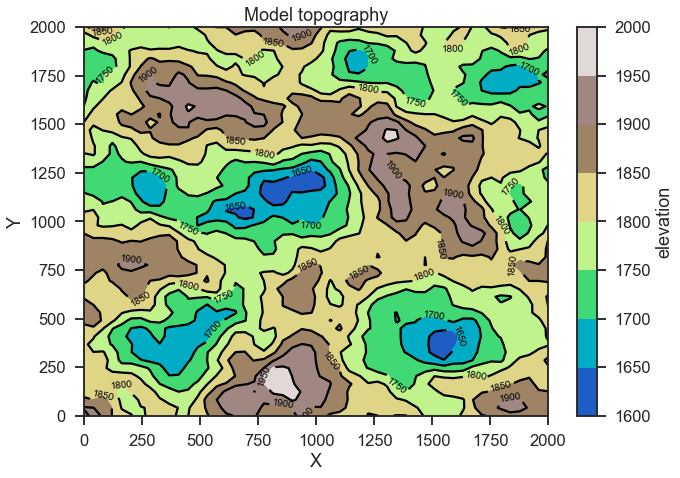

In [71]:
#Create model:
geo_model = gp.create_model('tutorial')                                                                          #create model object
gp.init_data(geo_model, [xmin,xmax, ymin,ymax, zmin,zmax], [xres,yres,zres], path_o = orfile, path_i = intfile)  #import data
gp.map_series_to_surfaces(geo_model, 
                          {"Fault_Series":'Main_Fault',  
                           "Strat_Series": ('Sandstone_2','Siltstone','Shale', 'Sandstone_1', 'basement')})      #set series & formation order
geo_model.set_is_fault(['Fault_Series'])                                                                         #set presence of fault
#gp.plot.plot_data(geo_model, direction = 'y')
geo_model.grid.set_topography(source='random')                        #set the model topography to a random array

#Run model:
interp_data = gp.set_interpolation_data(geo_model, theano_optimizer='fast_compile')
sol = gp.compute_model(geo_model)

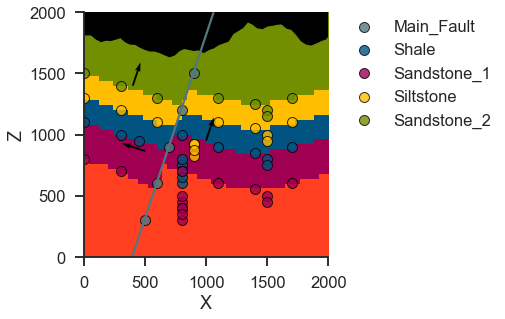

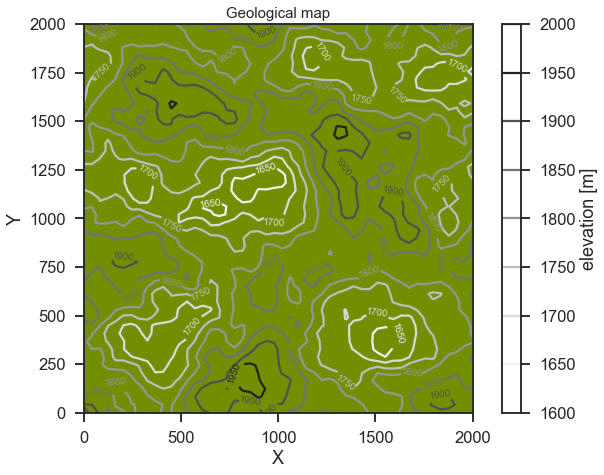

In [72]:
#Visualize model:
gp.plot.plot_section(geo_model, cell_number=25, direction='y', show_data=True)  #plot 2D cross-section
#ver,sim = gp.get_surfaces(geo_model)                                            #get surface for 3D visualization
#gp.plot.plot_3D(geo_model)                                                      #plot in 3D using vtk (remember to close window after) - surfaces not visible here
#gp.plot.PlotData2D(geo_model).plot_map(geo_model.solutions)                      #plot geologic map (method 1)
gp.plot.plot_map(geo_model, contour_lines=True)                                 #plot geologic map (method 2)

### Tutorial 1-7

[440720 471440  69280 100000] [512 512]
Cropped raster to geo_model.grid.extent.
[440720 441129  69280  69689] [7 7]
storing converted file...
Compiling theano function...
Compilation Done!


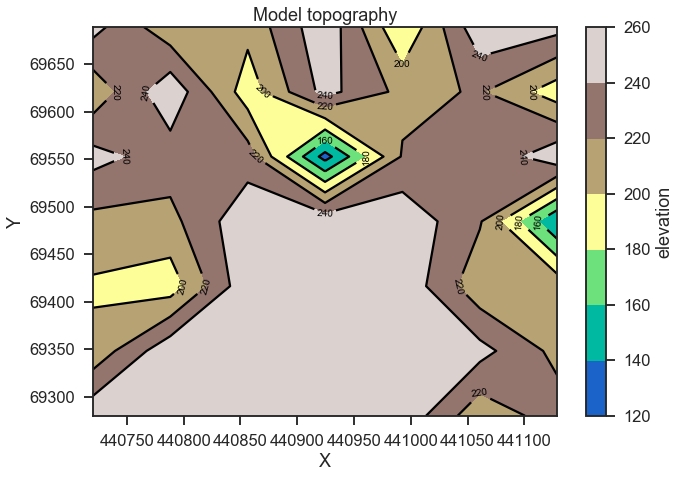

In [175]:
#Create model:
geo_model = gp.create_model('tutorial_1_7')                                 #create model object
gp.init_data(geo_model, extent=[xmin,xmax, ymin,ymax, zmin,zmax], resolution=[xres,yres,zres], path_o=orfile, path_i=intfile)  #import data
gp.map_series_to_surfaces(geo_model, {'series':('layer1','basement')})      #set series & formation order
geo_model.grid.set_topography(source='gdal', filepath=demfile)              #set the model topography from a file
#geo_model.set_topography(source='random')                                  #set the model topography randomly
geo_model.grid.set_active('topography')
geo_model.grid.set_active('regular')

#Run model:
interp_data = gp.set_interpolation_data(geo_model, output='geology', theano_optimizer='fast_compile')   #when using topography, set output='geology'? (why?)
sol = gp.compute_model(geo_model, compute_mesh=True)                                                    #to see both interfaces and topography, set compute_mesh=True

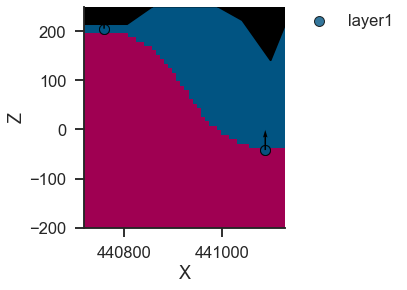

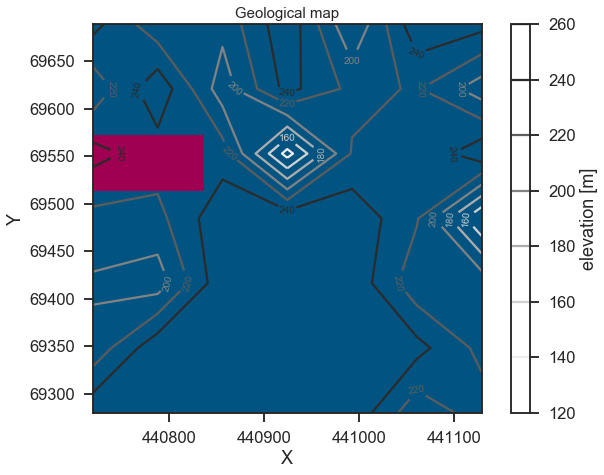

In [176]:
#Visualize model:
gp.plot.plot_section(geo_model, cell_number=25, direction='y', show_data=True)  #plot 2D cross-section
ver,sim = gp.get_surfaces(geo_model)                                            #get surface for 3D visualization
gp.plot.plot_3D(geo_model)                                                      #plot in 3D using vtk (remember to close window after) - surfaces not visible here
gp.plot.plot_map(geo_model, contour_lines=True)                                 #plot geologic map (method 2)

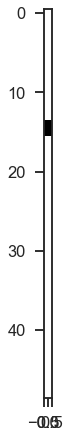

In [177]:
#Export model files to GSLIB:
mapping.export2gslib(geofile, sol.lith_block,        grid_info)  #sol.lith_block: 3D array of lithology values     
mapping.export2gslib(mapfile, sol.geological_map[0], grid_info)  #sol.geological_map: 2D array of lithology values at land surface

#Re-import and plot to check:
a = mapping.importgslib(geofile, grid_info)   #import lith_block
plt.imshow(a[:,:,25])                         #plot a cross-section

m = mapping.importgslib(mapfile, grid_info)   #import map
plt.imshow(m)                                #plot


In [178]:
#Dimension check:
print(xres*yres*zres)
print(np.shape(sol.lith_block))
print(xres*yres)
print(np.shape(sol.geological_map))
print(dir(sol))

125000
(125000,)
2500
(1, 49)
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_scalar_field_at_surface', 'additional_data', 'block_at_surface_points', 'block_matrix', 'compute_all_surfaces', 'compute_surface_regular_grid', 'edges', 'find_interfaces_from_block_bottoms', 'geological_map', 'gradient', 'grid', 'lith_block', 'mask_at_surface_points', 'mask_matrix', 'mask_matrix_pad', 'mask_topo', 'padding_mask_matrix', 'scalar_field_at_surface_points', 'scalar_field_matrix', 'series', 'set_solution_to_regular_grid', 'set_values_to_regular_grid', 'surface_points', 'surfaces', 'values_at_surface_points', 'values_matrix', 'vertices', 'weights_vector']


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_create_grid_mask', '_create_init', '_crop', '_find_indices', '_fit2model', '_line_in_section', '_resize', 'extent', 'load_from_gdal', 'load_from_saved', 'load_random_hills', 'regular_grid', 'resolution', 'save', 'show', 'topo', 'values', 'values_3D', 'values_3D_res']
[[4.40724090e+05 6.92840900e+04 2.10092969e+02]
 [4.40732270e+05 6.92840900e+04 2.11677362e+02]
 [4.40740450e+05 6.92840900e+04 2.12021805e+02]
 ...
 [4.41108550e+05 6.96849100e+04 2.19149782e+02]
 [4.41116730e+05 6.96849100e+04 2.16675286e+02]
 [4.41124910e+05 6.96849100e+04 2.12892268e+02]]


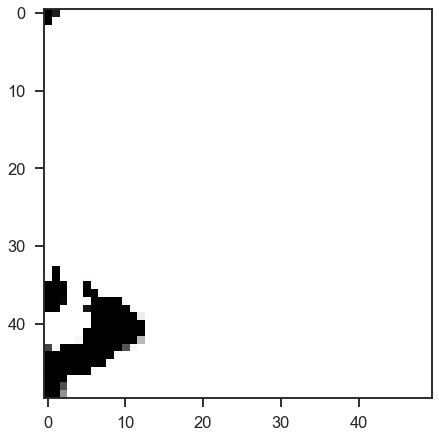

In [174]:
print(dir(sol.grid.topography))
print(sol.grid.topography.values)  #this gives an array of XYZ values for each cell at the land surface
m = np.reshape(sol.geological_map, (xres,yres))
plt.imshow(m)                      #can't tell if this is correct or not since the topo doesn't actually intersect the geology